## 006_Python Simulation
### State-Space Model in Python

In [1]:
import scipy.signal as signal

A = [[0, 1],
     [0, -1]]
B = [[0],
     [1]]
C = [[1, 0]]
D = 0
sys = signal.StateSpace(A, B, C, D)
print(sys)

StateSpaceContinuous(
array([[ 0,  1],
       [ 0, -1]]),
array([[0],
       [1]]),
array([[1, 0]]),
array([[0]]),
dt: None
)


# Step Response

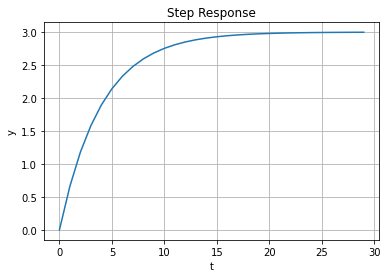

In [6]:
import scipy.signal as sig
import matplotlib.pyplot as plt
import numpy as np

#Simulation parameters
x0 = [0,0]

start = 0
stop = 30
step = 1
t = np.arange(start, stop, step)

N = len(t)

u = np.ones(N)

K = 3
T = 4

# State-Space Model
A = [[-1/T, 0],
     [0, 0]]
B = [[K/T],
     [0]]
c = [1, 0]
D = 0

sys = sig.StateSpace(A, B, C, D)

# Step Response
# t, y = sig.step(sys, x0, t)  # Method1

t, y, x = sig.lsim(sys, u, t) # Method2

# Plotting
plt.plot(t, y)
plt.title("Step Response")
plt.xlabel("t")
plt.ylabel("y")
plt.grid()
plt.show()
 

## Separate the state and plot 

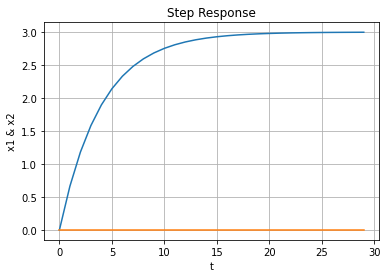

In [7]:
import scipy.signal as sig
import matplotlib.pyplot as plt
import numpy as np

#Simulation parameters
x0 = [0,0]

start = 0
stop = 30
step = 1
t = np.arange(start, stop, step)

N = len(t)

u = np.ones(N)

K = 3
T = 4

# State-Space Model
A = [[-1/T, 0],
     [0, 0]]
B = [[K/T],
     [0]]
c = [1, 0]
D = 0

sys = sig.StateSpace(A, B, C, D)

# Step Response
t, y, x = sig.lsim(sys, u, t) # Method2

x1 = x[:, 0]
x2 = x[:, 1]

# Plotting
plt.figure(2)
plt.plot(t, x1, t, x2)
plt.title("Step Response")
plt.xlabel("t")
plt.ylabel("x1 & x2")
plt.grid()
plt.show()

<img src="006_State_Space_Model.png" style="width: 1000px;"/>

In [8]:
import control

A = [[0, 1],
     [0, -1]]
B = [[0],
     [1]]
C = [[1, 0]]
D = 0
sys = control.ss(A, B, C, D)
print(sys)

<LinearIOSystem>: sys[2]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (2): ['x[0]', 'x[1]']

A = [[ 0.  1.]
     [ 0. -1.]]

B = [[0.]
     [1.]]

C = [[1. 0.]]

D = [[0.]]



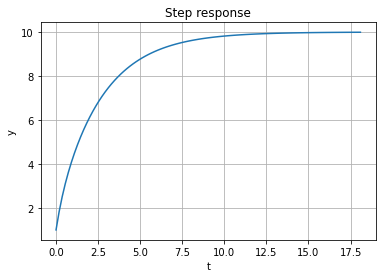

In [9]:
import control
import matplotlib.pyplot as plt

# Define State-Space model
A = [[0, 1], [-1, -3]]
B = [[1], [0]]
C = [[5, 6]]
D = [[1]]

ssmodel = control.ss(A, B, C, D)

# Step reponse for the system
t, y = control.step_response(ssmodel)

plt.plot(t, y)

plt.title("Step response")
plt.xlabel("t")
plt.ylabel("y")
plt.grid()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control

# Define State-Space model
A = [[0, 1], [-1, -3]]
B = [[0, 0], [2, 4]]
C = [[5, 6]]
D = [[1]]

ssmodel = control.ss(A, B, C, D)

# Step response for the system
start = 0
stop = 20
step = 0.1
t = np.arange(start, stop+1, step)

# Simulation parameters
u = 1

t, y, x = control.forced_response(ssmodel, t, u)

plt.plot(t, y)

plt.title("Step response")
plt.xlabel("t")
plt.ylabel("y")
plt.grid()
plt.show()

plt.figure(2)
x1 = x[0, :]
x2 = x[1, :]
